<a href="https://colab.research.google.com/github/Prajwayne/Natural-language-/blob/main/CRF_tagger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task2 of the Coursework : Loading of SEC Filings Data


## SEC Filings

In [ ]:
# raw_training_data = get_raw_data_from_bio_file('/content/FIN3.txt') 

In [ ]:
# print(len(raw_training_data), "instances")
# print(sum([len(sent) for sent in raw_training_data]), "words")

167836 instances
167836 words


In [ ]:
import os
import sys

from copy import deepcopy
from collections import Counter
from nltk.tag import CRFTagger
from nltk.tokenize import word_tokenize

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt
import numpy as np

import re
import unicodedata
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
#Lab code
import re
import numpy as np

def read_sec_filings(split):
    # Use this function to load the SEC filings data from text files
    
#     if split == 'train':
       
#             read_secfilings('train')
#     else:
        
#             read_secfilings('test')
    if split == 'train':
        with open('FIN5.txt', encoding='utf-8') as fp:
            lines = fp.readlines()
    else:
        with open('FIN3.txt', encoding='utf-8') as fp:
            lines = fp.readlines()
            
   
    sentences = []
    labels = []

    # the tokens and labels for the current sentence
    current_sen = []
    current_labels = []

    for i in range(2, len(lines)):
        # print(f'This is line {i}')
        # print(lines[i])

        if len(lines[i]) > 1:  # Line with some data on: The data consists of tokens and tags.
            data = re.split(' ', lines[i])  # tokenise the line
            # print(data)
            current_sen.append(data[0])  # append the token 
            
            # data[1] contains POS tags -- you can also use these in your model.
            
            current_labels.append(data[3].strip())  # append the NER tag
        elif len(current_sen) > 1:  # this marks the end of a sentence
            # end of sentence
            sentences.append(current_sen)  # save the tokens for this sentence
            current_sen = []  # reset

            labels.append(current_labels)  # save the tags for this sentence
            current_labels = []

    if len(current_sen) > 1:  # save the last sentence
        sentences.append(current_sen)
        labels.append(current_labels)
        
#     for i in range(len(labels)):
#         for j in range(len(labels[i])):
#             if labels[i][j]=='I-LOC':
#                 labels[i][j]='LOC'
#             if labels[i][j]=='I-ORG':
#                 labels[i][j]='ORG'
#             if labels[i][j]=='I-MISC':
#                 labels[i][j]='MISC'
#             if labels[i][j]=='I-PER':
#                 labels[i][j]='PER'           
    
    print(f'Number of sentences loaded = {len(sentences)}')
    print(f'Number of unique labels: {np.unique(np.concatenate(labels))}')
                                      
    return sentences, labels

In [45]:
#lab code
from sklearn.model_selection import train_test_split

print('Loading the original training set: ')
sentences_ner, labels_ner = read_sec_filings('train')

print('\nLoading the test set: ')
test_sentences_ner, test_labels_ner = read_sec_filings('test')

Loading the original training set: 
Number of sentences loaded = 1152
Number of unique labels: ['I-LOC' 'I-MISC' 'I-ORG' 'I-PER' 'O']

Loading the test set: 
Number of sentences loaded = 303
Number of unique labels: ['I-LOC' 'I-MISC' 'I-ORG' 'I-PER' 'O']


In [46]:
train_sentences_ner, val_sentences_ner, train_labels_ner, val_labels_ner = train_test_split(
    sentences_ner, 
    labels_ner, 
    test_size=0.2,
    # stratify=labels_ner  # there are too few examples of some classes to stratify
)

print(f'Number of training sentences = {len(train_sentences_ner)}')
print(f'Number of validation sentences = {len(val_sentences_ner)}')

Number of training sentences = 921
Number of validation sentences = 231


In [47]:
import numpy as np
sentences =  np.array(['f','g','y','g','f','t','g'])
labels = np.array(['q','s','w','q','s','w','s'])

remov = sentences != 'g'

labels = labels[remov]
sentences = sentences[remov]

labels, sentences

(array(['q', 'w', 's', 'w'], dtype='<U1'),
 array(['f', 'y', 'f', 't'], dtype='<U1'))

In [ ]:
list(labels)

['q', 'w', 's', 'w']

In [ ]:
#bikramjeet
train_set = [list(zip(sentences_ner[index],labels_ner[index]))for index,s in enumerate(sentences_ner)]
#val_set = [list(zip(val_sentences_ner[index],val_labels_ner[index]))for index,s in enumerate(val_sentences_ner)]
test_set = [list(zip(test_sentences_ner[index],test_labels_ner[index]))for index,s in enumerate(test_sentences_ner)]

#list(zip(train_set[0][1][0],train_set[0][1][1]))

#type(test_set[0][0][0])


In [ ]:
type(train_set)

In [ ]:
train_set

In [48]:
# Train the CRF  tagger
TAGGER_PATH = "crf_nlu.tagger"  # path to the tagger- it will save/access the model from here
ct = CRFTagger()  # initialize tagger with get_features function

print("training tagger...")
ct.train(train_set , TAGGER_PATH)
print("done")

training tagger...
done


In [49]:
#predicting on test set 
print("testing tagger...")
preds = []
y_test = []
for sent in test_set:
    sent_preds = [x[1] for x in ct.tag([s[0] for s in sent])]
    sent_true = [s[1] for s in sent]
    preds.extend(sent_preds)
    y_test.extend(sent_true)
print("done")

testing tagger...
done


In [50]:
# Output the classification report (which you should save each time for comparing your models)
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

       I-LOC       0.55      0.27      0.36        79
      I-MISC       0.00      0.00      0.00         7
       I-ORG       0.35      0.25      0.30       114
       I-PER       0.97      0.82      0.89       236
           O       0.99      1.00      0.99     12812

    accuracy                           0.98     13248
   macro avg       0.57      0.47      0.51     13248
weighted avg       0.98      0.98      0.98     13248



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#pip install crf-tagger

In [ ]:
labels = list(set(y_test))   # get the labels in the y_test
print(labels)

['I-MISC', 'I-PER', 'I-LOC', 'O', 'I-ORG']


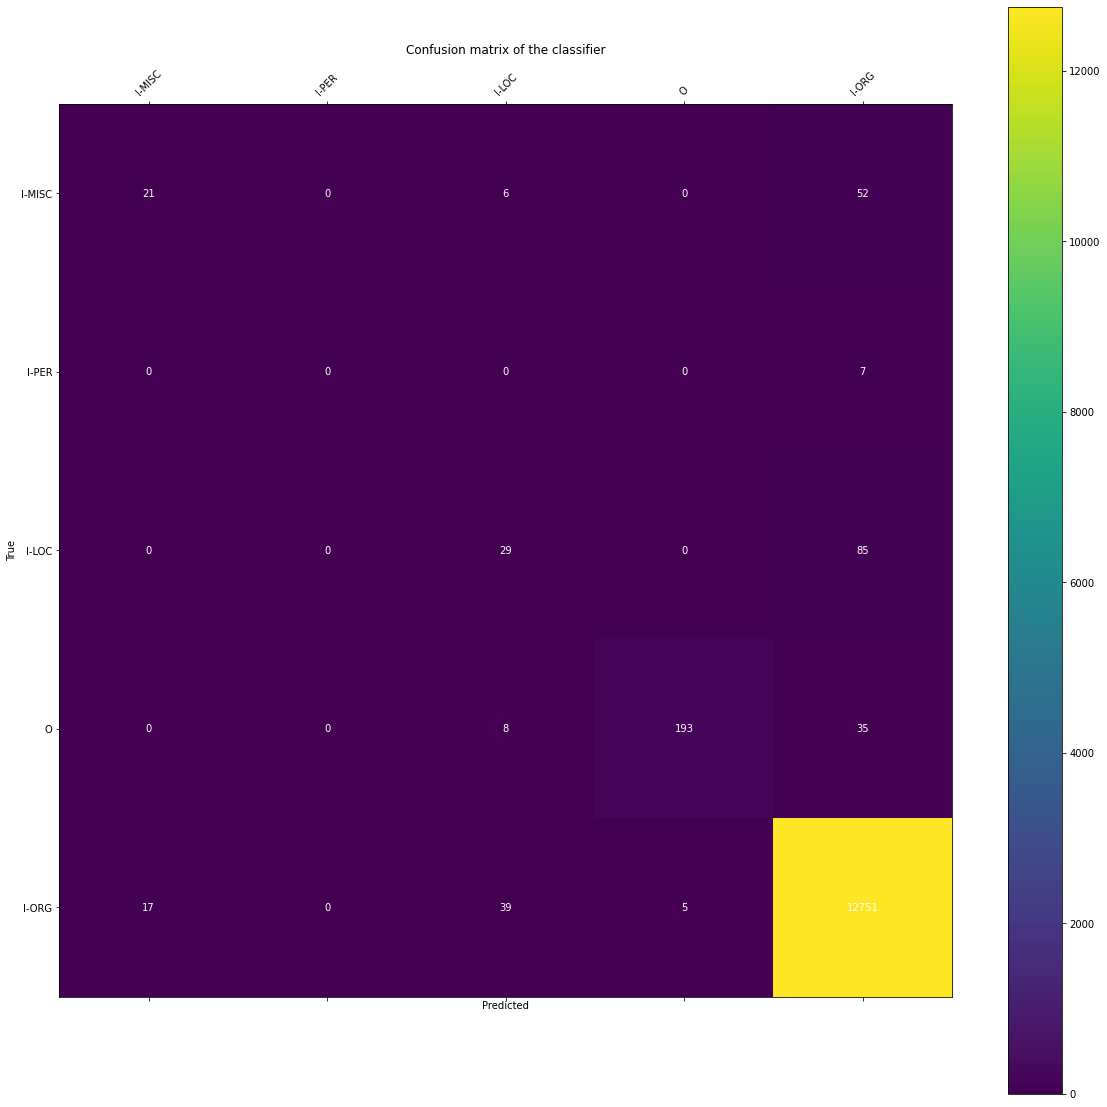

In [ ]:
"""Function to plot a confusion matrix"""
labels = list(set(y_test))   # get the labels in the y_test
# print(labels)
cm = confusion_matrix(y_test, preds)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels( labels, rotation=45)
ax.set_yticklabels( labels)

for i in range(len(cm)):
  for j in range(len(cm)):
    text = ax.text(j, i, cm[i, j],ha="center", va="center", color="w")

plt.xlabel('Predicted')
plt.ylabel('True')
    #fig.tight_layout()
plt.show()

Error analysis 1: False positives



In [ ]:
print("testing tagger...")
# we will train the data by using CRFTagger()
predict_result = [] #create list
y_predict = []
sent_predict_result = []
sent_y_predict = []  
for i in test_set:

      # we use the previous code the train the data
      sent_predict_result = [k[1] for k in ct.tag([j[0] for j in i])] # we will tag the word(j) by using ct.tag() and store tag in sent_predict_result
      sent_y_predict = [j[1] for j in i] # we store all BIO-tag, which has one line, in sent_y_predict
      predict_result.extend(sent_predict_result) # add the data in predict_result 
      y_predict.extend(sent_y_predict) # add the data in y_predict    


print("done")

testing tagger...
done


In [ ]:
print(classification_report(y_predict,predict_result))

              precision    recall  f1-score   support

       I-LOC       0.55      0.27      0.36        79
      I-MISC       0.00      0.00      0.00         7
       I-ORG       0.35      0.25      0.30       114
       I-PER       0.97      0.82      0.89       236
           O       0.99      1.00      0.99     12812

    accuracy                           0.98     13248
   macro avg       0.57      0.47      0.51     13248
weighted avg       0.98      0.98      0.98     13248



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd 
def classification_report_table(table): # this function will convert classification_report to csv file
   data_table = []
   column_data = table.split('\n') # split the data and consider in single-line
   for i in column_data[2:-5]: # iterate the data which consider only the data (not white space). So we use index from 2 until the last five lines
       row_classification = {} # create dictionary
       row_data = ' '.join(i.split()) # split the data by all white space and join the data again by one white space
       row_data = row_data.split(' ') # split the data again in order to visualise easily, P.S. we use this method to distiguish the column
       row_classification['class'] = row_data[0] # given data in class
       row_classification['precision'] = ' '.join(map(str, row_data[1:2])) #given data in precision
       row_classification['recall'] = ' '.join(map(str, row_data[2:3])) #given data in recall
       row_classification['f1-score'] = ' '.join(map(str, row_data[3:4])) #given data in f1-score
       row_classification['support'] = row_data[-1] #given data in support
       data_table.append(row_classification) # add the all data in single line to data_table
   df = pd.DataFrame.from_dict(data_table) # use this data to create csv file
   df.to_csv('classification_report.csv' ,index = False)
   
x = classification_report(y_predict, predict_result) #store classification_report in x
classification_report_table(x) # execute function

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y = pd.read_csv('classification_report.csv') # read classification_report.csv
print(y)

    class  precision  recall  f1-score  support
0   I-LOC       0.55    0.27      0.36       79
1  I-MISC       0.00    0.00      0.00        7
2   I-ORG       0.35    0.25      0.30      114
3   I-PER       0.97    0.82      0.89      236
4       O       0.99    1.00      0.99    12812


In [ ]:
y_precision = y.sort_values(by = ['precision']) # sort value by 'precision' from lowest to highest
y_precision[0:5] # visualise the five lowest precision to illustrate 5 cases in false postive

,class,precision,recall,f1-score,support
1,I-MISC,0.00,0.00,0.00,7
2,I-ORG,0.35,0.25,0.30,114
0,I-LOC,0.55,0.27,0.36,79
3,I-PER,0.97,0.82,0.89,236
4,O,0.99,1.00,0.99,12812


Error analysis 2: False negatives
For the 5 classes which have the lowest recall, according to the results table from your 20% development data,, print out all the sentences where there is a false negative for that label (i.e. the label is present in the ground truth label for a given word, but that label is not predicted for that word by the tagger).

Also, we should examine the 5 lowest recall of the classes, according to the 20% development data, finding the false negative for that label. For example,the label is present in the ground truth label for a given word, but that label is not predicted for that word by the tagger

In [ ]:
y_recall = y.sort_values(by = ['recall']) #sort value by 'recall' from lowest to highest
y_recall[0:5] #visualise the five lowest precision to illustrate 5 cases in false postive

,class,precision,recall,f1-score,support
1,I-MISC,0.00,0.00,0.00,7
2,I-ORG,0.35,0.25,0.30,114
0,I-LOC,0.55,0.27,0.36,79
3,I-PER,0.97,0.82,0.89,236
4,O,0.99,1.00,0.99,12812


In [ ]:
import pandas as pd

# make sure this points to the right place on your system:
data_file = 'Sentences_50Agree.txt'

df = pd.read_csv(data_file, sep='.@', header=0, names=['sentence', 'label'], encoding="windows_1258")

# change the words in the label column to numbers
df.loc[df["label"]=="negative", "label"] = 0
df.loc[df["label"]=="neutral", "label"] = 1
df.loc[df["label"]=="positive", "label"] = 2

# convert from a dataframe object to a dictionary of arrays
dataset = {
    "sentence": df["sentence"].to_numpy(),
    "label": df["label"].to_numpy()
}

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
from sklearn.model_selection import train_test_split

# Split test data from training data
train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    dataset['sentence'], 
    dataset['label'], 
    test_size=0.2, 
    stratify=dataset['label']  # make sure the same proportion of labels is in the test set and training set
)

In [52]:
x=list(zip(sentences_ner,labels_ner))
train_data=[]
for i in range(0,len(x)):
    y=list(zip(x[i][0],x[i][1]))
    train_data.append(y)

In [53]:
x1=list(zip(test_sentences_ner,test_labels_ner))
test_data=[]
for i in range(0,len(x1)):
    y1=list(zip(x1[i][0],x1[i][1]))
    test_data.append(y1)

In [54]:
import re, unicodedata
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

from nltk.stem import PorterStemmer
porter = PorterStemmer()

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

class CustomCRFTagger(nltk.tag.CRFTagger):
    _current_tokens = None
    
    def _get_features(self, tokens, idx):
            """
            Extract basic features about this word including
                - Current word
                - is it capitalized?
                - Does it have punctuation?
                - Does it have a number?
                - Suffixes up to length 3

            Note that : we might include feature over previous word, next word etc.

            :return: a list which contains the features
            :rtype: list(str)
            """
            token = tokens[idx]

            feature_list = []

            if not token:
                return feature_list

            # Capitalization
            if token[0].isupper():
                feature_list.append("CAPITAL")
                
            #All Caps
            if token.isupper():
                feature_list.append("ALL_CAPS")
            
            #All small
            if token.islower():
                feature_list.append("ALL_SMALL")
                
            #Stop words
            if token in stop_words:
                feature_list.append("STOPWORD")
            
            # Number
            if re.search(self._pattern, token) is not None:
                feature_list.append("HAS_NUM")
  
            # Punctuation
            if re.search(self._pattern, token) is None: #If not a number exctract following features
                punc_cat = {"Pc", "Pd", "Ps", "Pe", "Pi", "Pf", "Po"}
                if all(unicodedata.category(x) in punc_cat for x in token):
                    feature_list.append("PUNCTUATION")
            
                # Prefix up to length 3
                if len(token) > 1:
                    feature_list.append("PRE_" + token[0:3])
                if len(token) > 2:
                    feature_list.append("PRE_" + token[1:4])
                if len(token) > 3:
                    feature_list.append("PRE_" + token[2:5])
            
                # Affix up to length 3
                if len(token) > 3:
                    feature_list.append("AFF_" + token[2:-2])
            
                # Suffix up to length 3
                if len(token) > 1:
                    feature_list.append("SUF_" + token[-1:])
                if len(token) > 2:
                    feature_list.append("SUF_" + token[-2:])
                if len(token) > 3:
                    feature_list.append("SUF_" + token[-3:])
            
#                 #Stemming
#                 if re.sub(r'(.{2,}?)([aeiougyn]+$)',r'\1', token.lower()):
#                     feature_list.append("STEM")
                feature_list.append("STEM_"+porter.stem(token))
    
                #Lemma
                feature_list.append("LEMMA_"+lemmatizer.lemmatize(token))
            
#             #Hyphen
#             if re.search('^[a-zA-Z0-9]*-[-a-zA-Z0-9]*$',token):
#                 feature_list.append("HYPHEN")
            
            # Current word
            feature_list.append("WORD_" + token)
            
            ### WRITE YOUR OWN CODE HERE ###
            if idx > 0:
                feature_list.append("PREVWORD_" + tokens[idx-1])
            if idx < len(tokens)-1:
                feature_list.append("NEXTWORD_" + tokens[idx+1])
                
            if idx > 0:
                feature_list.append("PREVWORD-1_" + tokens[idx-2])
#             if idx < len(tokens)-1:
#                 feature_list.append("NEXTWORD+1_" + tokens[idx+2])
                
            ####
            print(feature_list)

            return feature_list
                

In [55]:
from nltk.tag import CRFTagger

# Train a CRF NER tagger
ct = CRFTagger()
ct.set_model_file('model.crf.tagger')

ct.train(train_data,'model.crf.tagger')

predicted_tags = ct.tag_sents(test_sentences_ner)
cal_span_level_f1(test_data, predicted_tags)

F1 score for class ORG = 0.36170212765957444
F1 score for class PER = 0.921951219512195
F1 score for class LOC = 0.31372549019607837
Macro-average f1 score = 0.5324596124559493
